In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial.distance as spd
import pickle
from sklearn.metrics import confusion_matrix
from numpy.linalg import pinv

No ficheiro A48168 Q001 data.p, encontram-se um conjunto de dados bi-dimensionais
divididos em 4 classes (´ındices de 0 a 3). Ha duas vari ´ aveis num dicion ´ ario: a chave ´
trueClass contem os ındices das classes dos dados, enquanto a chave dados contem´
os dados bidimensionais. Verificam-se as seguintes condic¸oes no conjunto de dados dis- ˜
ponibilizado:

In [2]:
fName = 'A48168_Q001_data.p'
D = pickle.load(open(fName,'rb'))

In [3]:
X = D['dados']
y = D['trueClass']
print(X.shape)
print(y.shape)

(2, 2150)
(2150,)


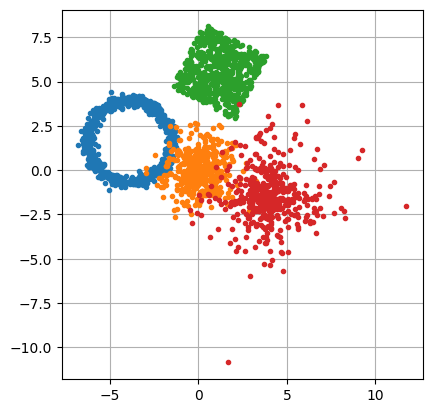

In [4]:
X0 = X[:,y==0]
X1 = X[:,y==1]
X2 = X[:,y==2]
X3 = X[:,y==3]

plt.plot(X[0,y==0],X[1,y==0],'.')
plt.plot(X[0,y==1],X[1,y==1],'.')
plt.plot(X[0,y==2],X[1,y==2],'.')
plt.plot(X[0,y==3],X[1,y==3],'.')
plt.axis('scaled')
plt.grid(True)

In [5]:
m0 = np.mean(X0,axis=1)
m1 = np.mean(X1,axis=1)
m2 = np.mean(X2,axis=1)
m3 = np.mean(X3,axis=1)
priori = np.round((len(X2)/len(X)),2)

cov0 = np.cov(X0)
cov1 = np.cov(X1)
cov2 = np.cov(X2)
cov3 = np.cov(X3)

print(np.round(priori,2))
print(np.round(cov3,2))

1.0
[[2.15 0.1 ]
 [0.1  2.35]]


In [6]:
m = np.mean(X,axis=1)
cov = np.cov(X)
print(m)
print(np.round(cov,2))

[0.00521356 1.90630119]
[[10.19 -1.27]
 [-1.27  9.08]]


In [7]:
city = np.sum(np.abs(m0-m3))
pint = np.dot(m0,m2)
norm0 = np.linalg.norm(m0)
norm2 = np.linalg.norm(m2)
cosine = 1 - (pint/(norm0*norm2))
print(np.round(city,2))
print(np.round(cosine,2))

11.11
0.79


In [8]:
print(m0)
print(np.round(m2,2))

[-3.92071653  1.74185169]
[1.18 5.58]


In [9]:
q = pickle.load(open('A48168_Ficha0_Respostas.p','rb'))

q['Q001'][0,:] = [0,1,0,0]
q['Q001'][1,:] = [0,0,0,1]
q['Q001'][2,:] = [1,0,0,0]
q['Q001'][3,:] = [0,1,0,0]

pickle.dump(q,open('A48168_Ficha0_Respostas.p','wb'))

In [10]:
vs = pickle.load(open('A48168_Ficha0_Respostas.p','rb'))
print(vs)

{'Q001': array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]]), 'nome': 'Diogo Sancho Pires Lobo', 'numero': 'A48168'}
